In [1]:
import bioalerts
import numpy as np

from bioalerts import LoadMolecules, Alerts, FPCalculator

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

# Machine learning modules
import sklearn
from sklearn import preprocessing
import scipy
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor

In [3]:
import sys, numpy as np, scipy as sc, rdkit, matplotlib as pylab, pandas as pd, IPython

In [4]:
#proteinTarget = 'NR-AR'
read_dir = './tutorial/datasets/tox21/'
smi = 'tox21_wholetraining.smi'
bio = 'tox21_wholetraining.bio'

## Tox21 significant substructure extraction

In [5]:
molecules = bioalerts.LoadMolecules.LoadMolecules(read_dir + smi,name_field=None)
molecules.ReadMolecules()
print "Total number of input molecules: ", len(molecules.mols)

Format of the structures file = SMILES
All molecules in the input file were processed correctly
Total number of input molecules:  8332


In [10]:
#stride = int(len(molecules.mols) * 0.9)
#training = molecules.mols[0:stride]
#test = molecules.mols[stride:len(molecules.mols)]
print len(molecules.mols) #, len(test), len(training)

8332


In [7]:
molecules.mols_ids[0:5]

[0, 1, 2, 3, 4]

In [11]:
training_dataset_info = bioalerts.LoadMolecules.GetDataSetInfo()

In [12]:
training_dataset_info.extract_substructure_information(radii=[2,3,4],mols=molecules.mols)

In [13]:
print len(training_dataset_info.substructure_dictionary.keys())

97905


In [ ]:
#training_dataset_info.substructure_dictionary[484]

In [14]:
bioactivities = np.genfromtxt(read_dir + bio,
                              dtype='int',
                              skip_header=0)
arr = np.arange(0,len(bioactivities))
mask = np.ones(arr.shape,dtype=bool)
mask[molecules.molserr]=0
bioactivities =  bioactivities[mask]

In [15]:
print len(bioactivities)
print len(molecules.mols)

8332
8332


In [ ]:
#bio_training = bioactivities[0:stride]
#bio_test = bioactivities[stride:len(molecules.mols)]
#print len(bioactivities), len(bio_test), len(bio_training)

In [16]:
Alerts_categorical = bioalerts.Alerts.CalculatePvaluesCategorical(max_radius=4)
toxic, nontoxic = {}, {}

toxic, nontoxic = Alerts_categorical.calculate_toxic_and_nontoxic_substructure(mols=molecules.mols,
                                      substructure_dictionary=training_dataset_info.substructure_dictionary,
                                      bioactivities=bioactivities,
                                      mols_ids=training_dataset_info.mols_ids,
                                      threshold_nb_substructures = 5,
                                      threshold_pvalue = 0.05,
                                      threshold_frequency = 0.7,
                                      Bonferroni=True)

Number of substructures processed:  385705
Significant toxic substructures:  94 substructures
Significant non toxic substructures : 4517 substructures


In [18]:
toxic
# 서브스트럭처가 전체 데이터에 대해 들어있는 비중은 같으니까 동일한 값 

{59582328: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 144862996: [0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334],
 238332961: [0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875],
 243031988: [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
 248538045: [0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334],
 289742792: [0.7142857142857143,
  0.7142857142857143,
  0.7142857142857143,
  0.7142857142857143,
  0.7142857142857143,
  0.7142857142857143,
  0.7142857142857143],
 291625364: [0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334],
 293645588: [0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75],
 303065576: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 316861206: [0.8461538461538461,
  0.8461538461538461,
  0

In [187]:
nontoxic

{3870277633L: [0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.8909090909090909,
  0.890909090909090

## Experiments settings

In [25]:
from sklearn.neighbors import KNeighborsRegressor #knn
from sklearn.ensemble import RandomForestRegressor #RF
from sklearn.svm import SVR #SVR

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt

In [147]:
wdir =  '../QSAR/AOP_data/'
csv = 'cleandata_estrogen_alpha_ic50_check-maccs-remcols-stdval.csv'
result_wdir = '../QSAR/AOP_data/'

train_read_dir = '../bioalerts/tutorial/datasets/'
train_smi = 'estrogen.smi'
train_bio = 'estrogen.bio.txt'

In [148]:
df = pd.read_csv(wdir+csv)

In [149]:
y = df['Standard Value']
x = df.drop(['Molecule','Standard Value'],axis=1)

## Data Visualization

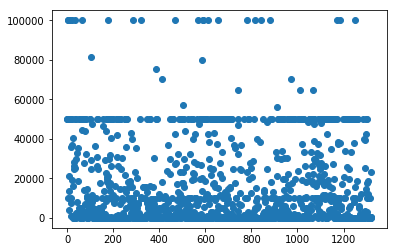

In [150]:
x_ = range(len(x))
plt.scatter(x_,y)
#plt.ylim(0,50000)

#### PIC transformation Formula ####
# PIC = 9 - np.log10(actual activity)
# actual activity = np,power(10,9-PIC)

## Data Preprocess 

In [ ]:
# training data 의 substructre 추출

In [151]:
AR_mols = bioalerts.LoadMolecules.LoadMolecules(train_read_dir + train_smi,name_field=None) 

In [152]:
AR_mols.ReadMolecules()

Format of the structures file = SMILES
All molecules in the input file were processed correctly


In [153]:
train_dataset_info = bioalerts.LoadMolecules.GetDataSetInfo(name_field=None)
train_dataset_info.extract_substructure_information(radii=[2,3,4],mols=AR_mols.mols)

In [154]:
train_substructure = train_dataset_info.substructure_dictionary
len(train_substructure)

27891

### comparison of substructures between training set and toxic data

insert additional feature to maccs-key bit operations 

In [156]:
for substr,indices in train_substructure.items() : 
    if substr in toxic.keys() :
        for idx in indices :
            if 0.7 <= toxic[substr][0] < 0.8 :
                for i in range(8):  
                    x.loc[idx,'significant_feature_{}'.format(i)] = 1.0
            elif 0.8 <= toxic[substr][0] < 0.9 : 
                for i in range(8):
                    x.loc[idx,'significant_feature_{}'.format(i)] = 2.0
            elif 0.9 <= toxic[substr][0] <1.0 : 
                for i in range(8):
                    x.loc[idx,'significant_feature_{}'.format(i)] = 3.0
            else:
                for i in range(8):
                    x.loc[idx,'significant_feature_{}'.format(i)] = 0.0
    #else : 
    #   for idx in indices:
    #        for i in range(8):
    #            x.loc[idx,'significant_feature_{}'.format(i)] = 0.0 
    

In [157]:
x = x.replace(np.nan,0.0)

In [158]:
print(len(x[x.significant_feature_1!=0.0]))
print(len(x))

107
1322


In [160]:
y_pic50 = 9 - np.log10(y)

## model train

### KNN

In [161]:
test_size = 0.1 
x_train, x_test, y_train, y_test = train_test_split(x,y_pic50,test_size = test_size, shuffle = True)

In [162]:
x_test_idx = []
for row in x_test.index:
    x_test_idx.append(row)

In [163]:
#fold setting
kf = RepeatedKFold(n_splits = 5,n_repeats=10)
kf.get_n_splits(x_train)
#kf
#>>> KFold(n_splits=5, random_state=None, shuffle=False)

#for numbering k folds
k=0
cv_rmse = []
cv_rmse_mean = []
tmp = []

#DataFrame generate
y_pic_pred_result = pd.DataFrame()
y_pic_pred_result['idx'] = pd.Series([i for i in range(len(y))])


##################    using hyperparameter tuning model    ##################    
#model generate
neigh = KNeighborsRegressor(n_neighbors = 6, metric='matching',weights='distance',algorithm='auto')
#KNN without sig, for androgen {'n_neighbors': 5, 'metric': 'matching', 'weights': 'distance', 'algorithm': 'brute'}
##################    using hyperparameter tuning model    ##################


#cross-val training
for train_idx, test_idx in kf.split(x_train):
    #print("iteration num : {}".format(k))
    #print("train : ", train_idx, "\ntest : ", test_idx)
    x_cv_train , x_cv_test = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_cv_train , y_cv_test = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    neigh.fit(x_cv_train,y_cv_train)
    
    y_cv_testidx = test_idx
    y_cv_pred = neigh.predict(x_cv_test)
    cv_rmse.append(round(np.sqrt(mean_squared_error(y_cv_test,y_cv_pred)),4))
    cv_rmse_mean.append(round(np.sqrt(mean_squared_error(y_cv_test,y_cv_pred)),4))
    
    y_pic_pred_result['y_cv_testidx_{}'.format(k)] = pd.Series()
    y_pic_pred_result['y_cv_pred_{}'.format(k)] = pd.Series()
    
    for j in range(len(y_cv_testidx)):
        y_pic_pred_result.loc[y_cv_testidx[j],'y_cv_testidx_{}'.format(k)] = y_cv_testidx[j]
        y_pic_pred_result.loc[y_cv_testidx[j],'y_cv_pred_{}'.format(k)] = y_cv_pred[j]            
    
    #y_pic_pred_result['y_cv_testidx_{}'.format(i)] = pd.Series(y_cv_testidx)
    #y_pic_pred_result['y_cv_pred_{}'.format(i)] = pd.Series(y_cv_pred)
    k += 1 
    
    if k % 5 == 0 : 
        tmp.append(np.mean(cv_rmse_mean))
        print(cv_rmse_mean) # per fold rmse value in one cv 
        print("mean : ",np.mean(cv_rmse_mean)) # RMSE mean value per iteration of cv  
        del cv_rmse_mean[:]
        

print("total fold mean : ", round(np.mean(cv_rmse),4)) # mean of 50 cv rmse (1회 iter돌 때의 모든 rmse의 평균 (50회의 평균)) 
print("total cv mean : ",round(np.mean(tmp),4)) # mean of cv's mean of 1 iter (각 cv rmse 평균의 평균) # we need var of this value 

#model retrain with all train data  
neigh.fit(x_train,y_train) # > model train
y_pic_test_pred = neigh.predict(x_test) # > model predidction

# 
y_pic_test_pred_df = pd.DataFrame(columns=['y_pic_test_idx','y_pic_test_pred'])
for j in range(len(x_test_idx)):
        y_pic_test_pred_df.loc[x_test_idx[j],'y_pic_test_idx'] = x_test_idx[j]
        y_pic_test_pred_df.loc[x_test_idx[j],'y_pic_test_pred'] = y_pic_test_pred[j]
#y_pic_test_pred_df = pd.DataFrame(y_pic_test_pred,columns=['y_pic_test_pred'])
y_pic_pred_result = pd.concat([y_pic_pred_result, y_pic_test_pred_df], axis=1, ignore_index=False)

#save csv 
#y_pic_pred_result.to_csv(result_wdir+'5-alpha-reductase_dltnan_y_pic_pred_result+with_significant_feature.csv',index=True)


[0.8165, 0.8397, 0.8858, 0.7477, 0.7405]
('mean : ', 0.8060400000000001)
[0.7257, 0.8671, 0.8398, 0.8158, 0.7777]
('mean : ', 0.8052199999999999)
[0.7566, 0.8787, 0.7823, 0.7624, 0.8312]
('mean : ', 0.8022400000000001)
[0.8044, 0.8332, 0.7939, 0.8445, 0.7774]
('mean : ', 0.81068)
[0.8509, 0.8361, 0.8272, 0.7487, 0.767]
('mean : ', 0.8059799999999999)
[0.7781, 0.8383, 0.8002, 0.7955, 0.8242]
('mean : ', 0.80726)
[0.8007, 0.7654, 0.8073, 0.8025, 0.9051]
('mean : ', 0.8162)
[0.8973, 0.7402, 0.86, 0.8587, 0.7969]
('mean : ', 0.83062)
[0.8243, 0.6639, 0.8314, 0.8282, 0.8391]
('mean : ', 0.7973800000000001)
[0.8451, 0.8118, 0.7488, 0.7345, 0.8825]
('mean : ', 0.80454)
('total fold mean : ', 0.8086)
('total cv mean : ', 0.8086)


In [164]:
#RESULT
print("train data size : {} ({}%)\n".format(len(x_train),round((len(x_train)/len(x)),2)), "test data size : {} ({}%)\n".format(len(x_test),round((len(x_test)/len(x)),2)))
print("each CV RMSE average : \n{} \nVARIANCE of RMSE of every folds : {}\n".format(tmp,round(np.var(cv_rmse),4)))

print("total 50 folds RMSE mean : ", round(np.mean(cv_rmse),4)) # mean of 50 cv rmse (1회 iter돌 때의 모든 rmse의 평균 (50회의 평균)) 
print("total 10 CVs RMSE mean : ",round(np.mean(tmp),4)) # mean of cv's mean of 1 iter (각 cv rmse 평균의 평균) # we need var of this value 

# test rseult 
print("\ntest RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test,y_pic_test_pred)),4)) )

('train data size : 1189 (0.0%)\n', 'test data size : 133 (0.0%)\n')
each CV RMSE average : 
[0.8060400000000001, 0.8052199999999999, 0.8022400000000001, 0.81068, 0.8059799999999999, 0.80726, 0.8162, 0.83062, 0.7973800000000001, 0.80454] 
VARIANCE of RMSE of every folds : 0.0024

('total 50 folds RMSE mean : ', 0.8086)
('total 10 CVs RMSE mean : ', 0.8086)

test RMSE : 0.6952


### RF

In [181]:
from sklearn.model_selection import GridSearchCV
RF = RandomForestRegressor()
RF_param_grid = {'n_estimators':[40,60,80,100],
              'max_depth':[30,40,50,None],
                'min_samples_split':[2,3,4,5,6]} 
RF_search = GridSearchCV(RF,RF_param_grid,cv=5)
RF_search.fit(x_train,y_train)
print("Bset Parameters set found on GridSearch CV :\n")
print(RF_search.best_params_)

Bset Parameters set found on GridSearch CV :

{'min_samples_split': 3, 'n_estimators': 80, 'max_depth': 40}


In [182]:
print("Grid scores on GridSearchCV :\n")

means = RF_search.cv_results_['mean_test_score']
stds = RF_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, RF_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Grid scores on GridSearchCV :

0.712 (+/-0.065) for {'min_samples_split': 2, 'n_estimators': 40, 'max_depth': 30}
0.723 (+/-0.051) for {'min_samples_split': 2, 'n_estimators': 60, 'max_depth': 30}
0.720 (+/-0.062) for {'min_samples_split': 2, 'n_estimators': 80, 'max_depth': 30}
0.727 (+/-0.069) for {'min_samples_split': 2, 'n_estimators': 100, 'max_depth': 30}
0.720 (+/-0.059) for {'min_samples_split': 3, 'n_estimators': 40, 'max_depth': 30}
0.722 (+/-0.071) for {'min_samples_split': 3, 'n_estimators': 60, 'max_depth': 30}
0.721 (+/-0.058) for {'min_samples_split': 3, 'n_estimators': 80, 'max_depth': 30}
0.723 (+/-0.061) for {'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 30}
0.718 (+/-0.074) for {'min_samples_split': 4, 'n_estimators': 40, 'max_depth': 30}
0.719 (+/-0.065) for {'min_samples_split': 4, 'n_estimators': 60, 'max_depth': 30}
0.727 (+/-0.058) for {'min_samples_split': 4, 'n_estimators': 80, 'max_depth': 30}
0.724 (+/-0.056) for {'min_samples_split': 4, 'n_estim

In [183]:
test_size = 0.1 
x_train, x_test, y_train, y_test = train_test_split(x,y_pic50,test_size = test_size, shuffle = True)

In [184]:
x_test_idx = []
for row in x_test.index:
    x_test_idx.append(row)

In [185]:
#fold setting
kf = RepeatedKFold(n_splits = 5,n_repeats=10)
kf.get_n_splits(x_train)
#kf
#>>> KFold(n_splits=5, random_state=None, shuffle=False)

#for numbering k folds
k=0
cv_rmse = []
cv_rmse_mean = []
tmp = []

#DataFrame generate
y_pic_pred_result = pd.DataFrame()
y_pic_pred_result['idx'] = pd.Series([i for i in range(len(y))])

#model generate
##################    using hyperparameter tuning model    ##################    
RF = RandomForestRegressor(n_estimators= 80,min_samples_split=3,max_depth=40)

#RF without sig, for androgen {'min_samples_split': 5, 'n_estimators': 40, 'max_depth': 40}
#RF with sig, for androgen 

#RF without sig, for aromatase {'min_samples_split': 3, 'n_estimators': 60, 'max_depth': 30}
#RF with sig , for aromatase {'min_samples_split': 2, 'n_estimators': 40, 'max_depth': None}

#RF with toxic substructure {'min_samples_split': 3, 'n_estimators': 80, 'max_depth': 40}
##################    using hyperparameter tuning model    ##################

#cross-val training
for train_idx, test_idx in kf.split(x_train):
    #print("iteration num : {}".format(k))
    #print("train : ", train_idx, "\ntest : ", test_idx)
    x_cv_train , x_cv_test = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_cv_train , y_cv_test = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    RF.fit(x_cv_train,y_cv_train)
    
    y_cv_testidx = test_idx
    y_cv_pred = RF.predict(x_cv_test)
    cv_rmse.append(round(np.sqrt(mean_squared_error(y_cv_test,y_cv_pred)),4))
    cv_rmse_mean.append(round(np.sqrt(mean_squared_error(y_cv_test,y_cv_pred)),4))
    
    y_pic_pred_result['y_cv_testidx_{}'.format(k)] = pd.Series()
    y_pic_pred_result['y_cv_pred_{}'.format(k)] = pd.Series()
    
    for j in range(len(y_cv_testidx)):
        y_pic_pred_result.loc[y_cv_testidx[j],'y_cv_testidx_{}'.format(k)] = y_cv_testidx[j]
        y_pic_pred_result.loc[y_cv_testidx[j],'y_cv_pred_{}'.format(k)] = y_cv_pred[j]
        
    
    
    #y_pic_pred_result['y_cv_testidx_{}'.format(i)] = pd.Series(y_cv_testidx)
    #y_pic_pred_result['y_cv_pred_{}'.format(i)] = pd.Series(y_cv_pred)
    k += 1 
    
    if k % 5 == 0 : 
        tmp.append(np.mean(cv_rmse_mean))
        print(cv_rmse_mean) # per fold rmse value in one cv 
        print("mean : ",np.mean(cv_rmse_mean)) # RMSE mean value per iteration of cv  
        del cv_rmse_mean[:]
        

print("total fold mean : ", round(np.mean(cv_rmse),4)) # mean of 50 cv rmse (1회 iter돌 때의 모든 rmse의 평균 (50회의 평균)) 
print("total cv mean : ",round(np.mean(tmp),4)) # mean of cv's mean of 1 iter (각 cv rmse 평균의 평균) # we need var of this value 

#model retrain with all train data  
RF.fit(x_train,y_train) # > model train
y_pic_test_pred = RF.predict(x_test) # > model predidction

# 
y_pic_test_pred_df = pd.DataFrame(columns=['y_pic_test_idx','y_pic_test_pred'])
for j in range(len(x_test_idx)):
        y_pic_test_pred_df.loc[x_test_idx[j],'y_pic_test_idx'] = x_test_idx[j]
        y_pic_test_pred_df.loc[x_test_idx[j],'y_pic_test_pred'] = y_pic_test_pred[j]
#y_pic_test_pred_df = pd.DataFrame(y_pic_test_pred,columns=['y_pic_test_pred'])
y_pic_pred_result = pd.concat([y_pic_pred_result, y_pic_test_pred_df], axis=1, ignore_index=False)

#save csv 
#y_pic_pred_result.to_csv(result_wdir+'5-alpha-reductase_dltnan_y_pic_pred_result+with_significant_feature.csv',index=True)


[0.6815, 0.7142, 0.7189, 0.7558, 0.7855]
('mean : ', 0.7311799999999999)
[0.6938, 0.635, 0.6328, 0.8176, 0.7751]
('mean : ', 0.71086)
[0.7207, 0.666, 0.6911, 0.7392, 0.7548]
('mean : ', 0.7143599999999999)
[0.7003, 0.7122, 0.7286, 0.7359, 0.7025]
('mean : ', 0.7159000000000001)
[0.709, 0.698, 0.8194, 0.7932, 0.7458]
('mean : ', 0.75308)
[0.7431, 0.6708, 0.7075, 0.7912, 0.6872]
('mean : ', 0.71996)
[0.7312, 0.6606, 0.7863, 0.7388, 0.7249]
('mean : ', 0.7283599999999999)
[0.7305, 0.7404, 0.6883, 0.7853, 0.6841]
('mean : ', 0.7257199999999999)
[0.6976, 0.6852, 0.7478, 0.7627, 0.7294]
('mean : ', 0.7245400000000001)
[0.7978, 0.7211, 0.6557, 0.757, 0.6952]
('mean : ', 0.72536)
('total fold mean : ', 0.7249)
('total cv mean : ', 0.7249)


In [186]:
#RESULT
print("train data size : {} ({}%)\n".format(len(x_train),round((len(x_train)/len(x)),2)), "test data size : {} ({}%)\n".format(len(x_test),round((len(x_test)/len(x)),2)))
print("each CV RMSE average : \n{} \nVARIANCE of RMSE of every folds : {}\n".format(tmp,round(np.var(cv_rmse),4)))

print("total 50 folds RMSE mean : ", round(np.mean(cv_rmse),4)) # mean of 50 cv rmse (1회 iter돌 때의 모든 rmse의 평균 (50회의 평균)) 
print("total 10 CVs RMSE mean : ",round(np.mean(tmp),4)) # mean of cv's mean of 1 iter (각 cv rmse 평균의 평균) # we need var of this value 

# test rseult 
print("\ntest RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test,y_pic_test_pred)),4)) )

('train data size : 1189 (0.0%)\n', 'test data size : 133 (0.0%)\n')
each CV RMSE average : 
[0.7311799999999999, 0.71086, 0.7143599999999999, 0.7159000000000001, 0.75308, 0.71996, 0.7283599999999999, 0.7257199999999999, 0.7245400000000001, 0.72536] 
VARIANCE of RMSE of every folds : 0.002

('total 50 folds RMSE mean : ', 0.7249)
('total 10 CVs RMSE mean : ', 0.7249)

test RMSE : 0.6112


In [191]:
# 서브스트럭처가 전체 데이터에 대해 들어있는 비중은 같으니까 동일한 값 
dica = {'a':[3,4,5],'b':[6,7]}
ll = ['a','b','c']
for l in ll:
    if l in dica.keys():
        #dica[l].append(99)
        continue
    else:
        dica.update({l:[i for i in range(40,44)]})
dica

{'a': [3, 4, 5], 'b': [6, 7], 'c': [40, 41, 42, 43]}